### This is one MCell (so only one cell of the 2-coupled topology)
Evidently, the graphs are not as expected.

In [33]:
!pip install neuron

In [34]:
import os
import sys

if os.getcwd() != "/content":
    # we are not in google colab, assume hebbian library is in current dir
    from hebb import MCELL
else:
    # download from git
    import shutil, requests
    url = 'https://cloud.operationtulip.com/s/MdM955dETWo9Cke/download/git.zip'
    response = requests.get(url, stream=True)
    with open('git.zip', 'wb') as out_file:
        shutil.copyfileobj(response.raw, out_file)
    del response
    import zipfile
    with zipfile.ZipFile('git.zip', 'r') as zip_ref:
        zip_ref.extractall('')
    from hebb_test import MCELL
from neuron import h
from neuron.units import ms,mV
h.load_file('stdrun.hoc')   
from bokeh.io import output_notebook
import bokeh.plotting as plt2
output_notebook()

In [35]:
!nrnivmodl

/content
Mod files: "./blr3000.mod" "./blr3001.mod" "./blr3002.mod" "./blr3003.mod" "./ciliaProp.mod" "./dendProp.mod" "./hh1.mod"

COBJS=''
 -> Compiling mod_func.c
x86_64-linux-gnu-gcc -O2   -I.   -I/usr/local/lib/python3.7/dist-packages/neuron/.data/include  -I/nrnwheel/openmpi/include -fPIC -c mod_func.c -o mod_func.o
 -> NMODL ../blr3002.mod
(cd ".."; MODLUNIT=/usr/local/lib/python3.7/dist-packages/neuron/.data/share/nrn/lib/nrnunits.lib /usr/local/lib/python3.7/dist-packages/neuron/.data/bin/nocmodl blr3002.mod -o "/content/x86_64")
 -> NMODL ../blr3001.mod
(cd ".."; MODLUNIT=/usr/local/lib/python3.7/dist-packages/neuron/.data/share/nrn/lib/nrnunits.lib /usr/local/lib/python3.7/dist-packages/neuron/.data/bin/nocmodl blr3001.mod -o "/content/x86_64")
 -> NMODL ../blr3000.mod
(cd ".."; MODLUNIT=/usr/local/lib/python3.7/dist-packages/neuron/.data/share/nrn/lib/nrnunits.lib /usr/local/lib/python3.7/dist-packages/neuron/.data/bin/nocmodl blr3000.mod -o "/content/x86_64")
Translating b

# make stairstep function

In [36]:
def stairstep(lo: float, hi: float, duration: int, max_duration: int = 200) -> list:
    # duration and max_duration are in ms
    return [lo if i < duration else hi for i in range(0,max_duration)]
    # return [0+0.8*(i/duration) if i < duration else 0 for i in range(0,max_duration)]

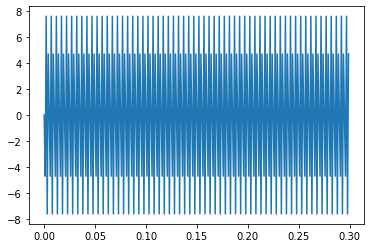

In [37]:
import numpy as np, math
from matplotlib import pyplot as plt
sines1 = [8*np.sin(3200*math.pi*x) for x in np.arange(0, 0.3, 0.001)]
x_coord = [x for x in np.arange(0, 0.3, 0.001)]
plt.plot(x_coord, sines1)


In [38]:
#Gives one 2 coupled neuron using freeman's topology in olfactory bulb
class CONNECTING:

    def __init__(self,M,weights,delay1=1,delay2=1,delay3=1,delay4=1):
        wMM=weights[0]
        
        self.M = M #Set no.
        self.th = -70
        self.maindelay = 0
        self.P1=MCELL(1,self.M)

        #Giving current pulse
        #rand_num = math.round(random.randint(0,1))
#       rand_num = abs(math.floor(random.randint(-1,1)))
        # self.sines = sines1
        # print(self.sines)
        self.sine_input = h.Vector(sines1)
        
        self.stim = h.IClamp(0.9, sec=self.P1.dend)
        self.sine_input.play(self.stim, self.stim._ref_amp, True)
        self.stim.delay = 1   #in ms
        self.stim.dur = 200     #in ms
        self.stim.amp = 4  #in nA
        

In [39]:
import numpy as np
low, high = 0.05, 0.1
all_weights = np.random.uniform(low, high,1)
L1=CONNECTING(1,all_weights)

In [40]:
h.topology()


|-|       Set [2]_Mcell [1].soma(0-1)
   `|       Set [2]_Mcell [1].dend(0-1)
 `|       Set [2]_Mcell [1].axon(0-1)
|-|       Set [2]_Mcell [1].soma(0-1)
   `|       Set [2]_Mcell [1].dend(0-1)
 `|       Set [2]_Mcell [1].axon(0-1)



1.0

In [41]:
from neuron import h, gui2
gui2.set_backend('jupyter')
ps = gui2.PlotShape()
ps.variable('v')
ps.show(0)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Voltage vs Time Graph

In [42]:
recording_cell = L1.P1
axon_m1 = h.Vector().record(recording_cell.axon(0.5)._ref_v)
dend_m1 = h.Vector().record(recording_cell.dend(0.5)._ref_v)
t = h.Vector().record(h._ref_t)

h.finitialize(-70 * mV)
h.continuerun(300 * ms)

f = plt2.figure(x_axis_label='t (ms)', y_axis_label='v (mV)')
f.line(t, list(axon_m1), line_width=1,legend_label='M1 axon (4-coupled)',line_color='black')
f.line(t, list(dend_m1), line_width=2,legend_label='M1 dendrite (4-coupled)',line_color='red', line_dash='dashed')
plt2.show(f)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Parameter Plots

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

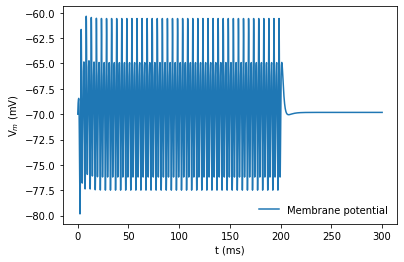

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

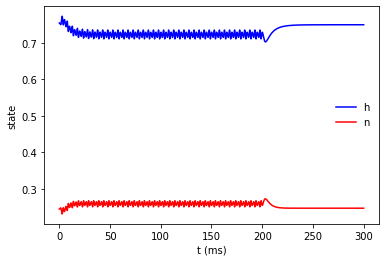

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

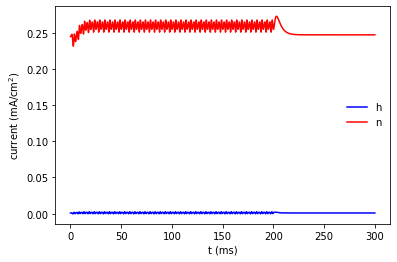

In [43]:
import numpy as np
from matplotlib import pyplot

checkCell = L1.P1.axon(0.5)

tvec = h.Vector().record(h._ref_t)

vvecA = h.Vector().record(checkCell._ref_v)
kvecA = h.Vector().record(checkCell.k_ion._ref_ik)
# nvecA = h.Vector().record(checkCell.na_ion._ref_ina)
mvecA = h.Vector().record(checkCell.hh._ref_m)
hvecA = h.Vector().record(checkCell.hh._ref_h)
nvecA = h.Vector().record(checkCell.hh._ref_n)


h.finitialize(-70)
h.continuerun(300)

fig = pyplot.figure()
pyplot.plot(tvec, vvecA, label="Membrane potential")
pyplot.xlabel('t (ms)')
pyplot.ylabel('V$_m$ (mV)')
pyplot.legend(frameon=False)

fig = pyplot.figure()
pyplot.plot(tvec, hvecA, '-b', label='h')
pyplot.plot(tvec, nvecA, '-r', label='n')
pyplot.xlabel('t (ms)')
pyplot.ylabel('state')
pyplot.legend(frameon=False)


fig = pyplot.figure()
pyplot.plot(tvec, kvecA.as_numpy(), '-b', label='h')
pyplot.plot(tvec, nvecA.as_numpy(), '-r', label='n')
pyplot.xlabel('t (ms)')
pyplot.ylabel('current (mA/cm$^2$)')
pyplot.legend(frameon=False)

        


<IPython.core.display.Javascript object>

No handles with labels found to put in legend.


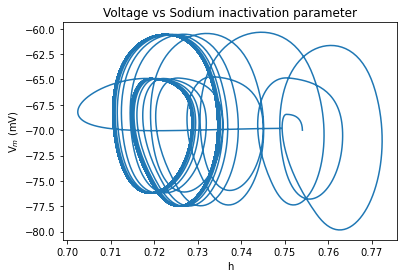

In [44]:
fig = pyplot.figure()
pyplot.plot(hvecA, vvecA, label="")
pyplot.xlabel('h')
pyplot.ylabel('V$_m$ (mV)')
pyplot.title('Voltage vs Sodium inactivation parameter')
pyplot.legend(frameon=False)

No handles with labels found to put in legend.


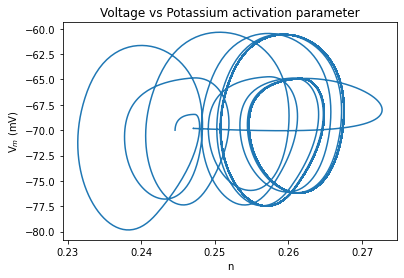

In [45]:
fig = pyplot.figure()
pyplot.plot(nvecA, vvecA, label="")
pyplot.xlabel('n')
pyplot.ylabel('V$_m$ (mV)')
pyplot.title('Voltage vs Potassium activation parameter')
pyplot.legend(frameon=False)

No handles with labels found to put in legend.


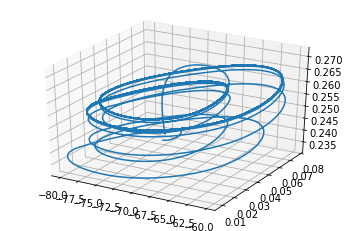

In [46]:
fig = pyplot.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(vvecA, mvecA, nvecA, hvecA)
# pyplot.xlabel('m')
# pyplot.ylabel('V$_m$ (mV)')
pyplot.legend(frameon=False)


<Figure size 432x288 with 0 Axes>

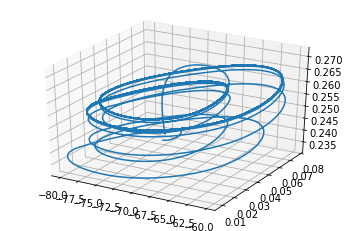

<Figure size 432x288 with 0 Axes>

In [47]:
fig = pyplot.figure()
ax = fig.add_subplot(111, projection='3d')
pyplot.plot(vvecA, mvecA, nvecA)
pyplot.figure(frameon=False)